# Using Local Geospatial Data

```{contents}
:local:
:depth: 2
```

## Introduction

## Technical requirements

```bash
conda create -n gee python
conda activate gee
conda install -c conda-forge mamba
mamba install -c conda-forge pygis
```

```bash
jupyter lab
```

In [ ]:
# %pip install pygis

In [2]:
import ee
import geemap

In [3]:
geemap.ee_initialize()

## Local raster datasets

### Single-band imagery

In [4]:
## Sirve para descargar cualquier archivo
url = 'https://github.com/giswqs/data/raw/main/raster/srtm90.tif' # Alojado en un server de Github
filename = 'dem.tif'
geemap.download_file(url, filename)

Downloading...
From: https://github.com/giswqs/data/raw/main/raster/srtm90.tif
To: c:\Users\skype\VS-python-codes\practicas-GEE\dem.tif
100%|██████████| 16.6M/16.6M [00:01<00:00, 11.2MB/s]


'c:\\Users\\skype\\VS-python-codes\\practicas-GEE\\dem.tif'

In [5]:
Map = geemap.Map()
Map.add_raster(filename, cmap='terrain', layer_name="DEM")
vis_params = {'min': 0, 'max': 4000, 'palette': 'terrain'}
Map.add_colorbar(vis_params, label='Elevation (m)')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [6]:
# Util para ver todas las paletas de color disponibles
import geemap.colormaps as cm

cm.list_colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Grays',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'coo

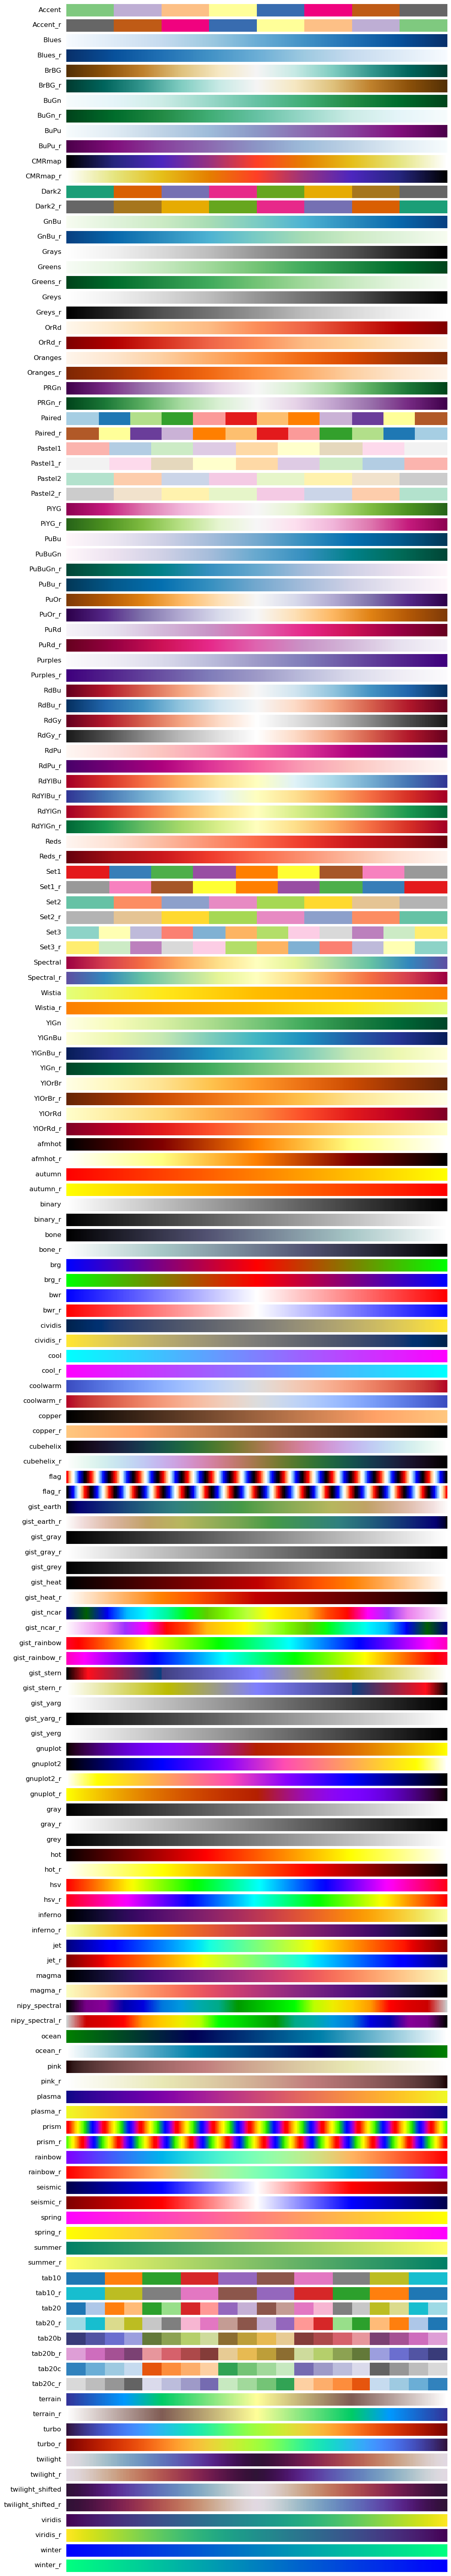

In [7]:
cm.plot_colormaps(width=12, height=0.4)

### Multi-band imagery

In [8]:
## Sirve para descargar cualquier archivo
url = 'https://github.com/giswqs/leafmap/raw/master/examples/data/cog.tif'
filename = 'cog.tif'
geemap.download_file(url, filename)

Downloading...
From: https://github.com/giswqs/leafmap/raw/master/examples/data/cog.tif
To: c:\Users\skype\VS-python-codes\practicas-GEE\cog.tif
100%|██████████| 611k/611k [00:00<00:00, 4.33MB/s]


'c:\\Users\\skype\\VS-python-codes\\practicas-GEE\\cog.tif'

In [9]:
# La diferencia con respecto a la anterior, es que tienes que especificas las bandas en una lista
# Si no especifico la banda
Map = geemap.Map()
Map.add_raster(filename, band=[4, 1, 2], layer_name="Color infrared")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### Interactive raster GUI

## Cloud Optimized GeoTIFF (COG)

### Visualizing COG

In [11]:
url = 'https://tinyurl.com/24bo8umr'

In [12]:
# Aceso a los bounds sin descargar la img
geemap.cog_bounds(url)

[-108.63447456563128,
 38.963980238226654,
 -108.38008268561431,
 40.025815049929754]

In [13]:
# Aceso al punto central sin descargar
geemap.cog_center(url)

(-108.5072786256228, 39.49489764407821)

In [14]:
# Nombres de las bandas
geemap.cog_bands(url)

['b1', 'b2', 'b3']

In [15]:
# Esto es el "título de la película" -> no nocesitas descargarlo, solamente verlo online
geemap.cog_tile(url)

'https://titiler.xyz/cog/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?url=https%3A%2F%2Fopendata.digitalglobe.com%2Fevents%2Fcalifornia-fire-2020%2Fpre-event%2F2018-02-16%2Fpine-gulch-fire20%2F1030010076004E00.tif&bidx=1&bidx=2&bidx=3&rescale=1.0%2C251.0'

In [17]:
Map = geemap.Map()
Map.add_cog_layer(url, name="Fire (pre-event)")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [18]:
## Cargamos también la imagen post-incendio 
url2 = 'https://tinyurl.com/2awjl66w'
Map.add_cog_layer(url2, name="Fire (post-event)")
Map

Map(bottom=50160.0, center=[39.49489764407821, -108.5072786256228], controls=(WidgetControl(options=['position…

## EJERCICIO: Leer en local imágenes 

### Creating COG

In [ ]:
url = "https://github.com/giswqs/data/raw/main/raster/srtm90.tif"
geemap.cog_validate(url)

In [ ]:
geemap.cog_validate(url, verbose=True)

In [ ]:
out_cog = "cog.tif"
geemap.image_to_cog(url, out_cog)

In [ ]:
geemap.cog_validate(out_cog)

In [ ]:
Map = geemap.Map()
Map.add_raster(out_cog, cmap="terrain", layer_name="Local COG")
Map.add_cog_layer(url, cmap="gist_earth", name="Remote COG")
vis_params = {'min': 0, 'max': 4000, 'palette': 'gist_earth'}
Map.add_colorbar(vis_params, label='Elevation (m)')
Map

### Converting NumPy arrays to COG

In [ ]:
url = 'https://github.com/giswqs/leafmap/raw/master/examples/data/cog.tif'
in_cog = 'cog.tif'
out_cog = "ndvi.tif"
geemap.download_file(url, in_cog, overwrite=True)

In [ ]:
arr = geemap.image_to_numpy(in_cog)

In [ ]:
arr.shape

In [ ]:
ndvi = (arr[3] - arr[0]) / (arr[3] + arr[0])

In [ ]:
ndvi.shape

In [ ]:
geemap.numpy_to_cog(ndvi, out_cog, profile=in_cog)

In [ ]:
Map = geemap.Map()
Map.add_raster(in_cog, band=[4, 1, 2], layer_name="Color infrared")
Map.add_raster(out_cog, cmap="Greens", layer_name="NDVI")
Map

### Clipping image by mask

In [ ]:
url = 'https://github.com/giswqs/data/raw/main/raster/srtm90.tif'
dem = 'dem.tif'
geemap.download_file(url, dem)

In [ ]:
Map = geemap.Map()
Map.add_raster(dem, cmap='terrain', layer_name="DEM")
Map

In [ ]:
mask = (
    'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/mask.geojson'
)

In [ ]:
mask = Map.user_roi

In [ ]:
mask = [
    [-119.679565, 37.256566],
    [-119.679565, 38.061067],
    [-118.24585, 38.061067],
    [-118.24585, 37.256566],
    [-119.679565, 37.256566],
]

In [ ]:
output = 'clip.tif'
geemap.clip_image(dem, mask, output)
Map.add_raster(output, cmap='coolwarm', layer_name="Clip Image")
Map

## SpatioTemporal Asset Catalog (STAC)

In [ ]:
url = 'https://tinyurl.com/22vptbws'

In [ ]:
geemap.stac_bounds(url)

In [ ]:
geemap.stac_center(url)

In [ ]:
geemap.stac_bands(url)

In [ ]:
geemap.stac_tile(url, bands=['B3', 'B2', 'B1'])

In [ ]:
Map = geemap.Map()
Map.add_stac_layer(url, bands=['pan'], name='Panchromatic')
Map.add_stac_layer(url, bands=['B3', 'B2', 'B1'], name='False color')
Map

## Vector datasets

### GeoJSON

In [ ]:
in_geojson = 'https://github.com/gee-community/geemap/blob/master/examples/data/cable_geo.geojson'
Map = geemap.Map()
Map.add_geojson(in_geojson, layer_name="Cable lines", info_mode="on_hover")
Map

In [ ]:
Map = geemap.Map()
Map.add_basemap("CartoDB.DarkMatter")
callback = lambda feat: {"color": "#" + feat["properties"]["color"], "weight": 2}
Map.add_geojson(in_geojson, layer_name="Cable lines", style_callback=callback)
Map

In [ ]:
url = "https://github.com/gee-community/geemap/blob/master/examples/data/countries.geojson"
Map = geemap.Map()
Map.add_geojson(
    url, layer_name="Countries", fill_colors=['red', 'yellow', 'green', 'orange']
)
Map

In [ ]:
import random

Map = geemap.Map()


def random_color(feature):
    return {
        'color': 'black',
        'weight': 3,
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }


Map.add_geojson(url, layer_name="Countries", style_callback=random_color)
Map

In [ ]:
Map = geemap.Map()

style = {
    "stroke": True,
    "color": "#0000ff",
    "weight": 2,
    "opacity": 1,
    "fill": True,
    "fillColor": "#0000ff",
    "fillOpacity": 0.1,
}

hover_style = {"fillOpacity": 0.7}

Map.add_geojson(url, layer_name="Countries", style=style, hover_style=hover_style)
Map

### Shapefile

In [ ]:
url = "https://github.com/gee-community/geemap/blob/master/examples/data/countries.zip"
geemap.download_file(url)

In [ ]:
Map = geemap.Map()
in_shp = "countries.shp"
Map.add_shp(in_shp, layer_name="Countries")
Map

### KML

In [ ]:
in_kml = (
    "https://github.com/gee-community/geemap/blob/master/examples/data/us_states.kml"
)

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_kml(in_kml, layer_name="US States")
Map

### GeoDataFrame

In [ ]:
import geopandas as gpd

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
gdf = gpd.read_file('countries.shp')
Map.add_gdf(gdf, layer_name="US States")
Map

### Other vector formats

In [ ]:
Map = geemap.Map()
data = (
    'https://github.com/gee-community/geemap/blob/master/examples/data/countries.gpkg'
)
Map.add_vector(data, layer_name="Countries")
Map

## Creating points from XY

### CSV to vector

In [ ]:
data = 'https://github.com/gee-community/geemap/blob/master/examples/data/us_cities.csv'
geemap.csv_to_df(data)

In [ ]:
geemap.csv_to_geojson(
    data, 'cities.geojson', latitude="latitude", longitude='longitude'
)

In [ ]:
geemap.csv_to_shp(data, 'cities.shp', latitude="latitude", longitude='longitude')

In [ ]:
geemap.csv_to_gdf(data, latitude="latitude", longitude='longitude')

In [ ]:
geemap.csv_to_vector(data, 'cities.gpkg', latitude="latitude", longitude='longitude')

### Adding points from XY

In [ ]:
cities = (
    'https://github.com/gee-community/geemap/blob/master/examples/data/us_cities.csv'
)
regions = 'https://github.com/gee-community/geemap/blob/master/examples/data/us_regions.geojson'

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_points_from_xy(cities, x="longitude", y="latitude")
Map

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)

Map.add_geojson(regions, layer_name='US Regions')

Map.add_points_from_xy(
    cities,
    x='longitude',
    y='latitude',
    layer_name='US Cities',
    color_column='region',
    icon_names=['gear', 'map', 'leaf', 'globe'],
    spin=True,
    add_legend=True,
)
Map

### Circle markers from points

In [ ]:
data = 'https://github.com/gee-community/geemap/blob/master/examples/data/us_cities.csv'

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_circle_markers_from_xy(
    data,
    x="longitude",
    y="latitude",
    radius=10,
    color="blue",
    fill_color="black",
    fill_opacity=0.5,
)
Map

## Vector data to Earth Engine

In [ ]:
in_geojson = 'https://github.com/gee-community/geemap/blob/master/examples/data/countries.geojson'
Map = geemap.Map()
fc = geemap.geojson_to_ee(in_geojson)
Map.addLayer(fc.style(**{'color': 'ff0000', 'fillColor': '00000000'}), {}, 'Countries')
Map

In [ ]:
url = "https://github.com/gee-community/geemap/blob/master/examples/data/countries.zip"
geemap.download_file(url, overwrite=True)

In [ ]:
in_shp = "countries.shp"
fc = geemap.shp_to_ee(in_shp)

In [ ]:
import geopandas as gpd

gdf = gpd.read_file(in_shp)
fc = geemap.gdf_to_ee(gdf)

In [ ]:
fc = geemap.vector_to_ee(url)

## Joining attribute tables

In [ ]:
Map = geemap.Map()
countries = ee.FeatureCollection(geemap.examples.get_ee_path('countries'))
Map.addLayer(countries, {}, 'Countries')
Map

In [ ]:
geemap.ee_to_df(countries)

In [ ]:
data = 'https://github.com/gee-community/geemap/blob/master/examples/data/country_centroids.csv'
df = geemap.csv_to_df(data)
df

In [ ]:
fc = geemap.ee_join_table(countries, data, src_key='ISO_A2', dst_key='country')

In [ ]:
geemap.ee_to_df(fc)

In [ ]:
Map.addLayer(fc, {}, 'Countries with attr')
Map

## Converting NetCDF to ee.Image

In [ ]:
import os

url = 'https://github.com/gee-community/geemap/blob/master/examples/data/wind_global.nc'
nc_file = 'wind_global.nc'
if not os.path.exists(nc_file):
    geemap.download_file(url)

In [ ]:
Map = geemap.Map()
img = geemap.netcdf_to_ee(nc_file=nc_file, var_names='u_wind')
vis_params = {'min': -20, 'max': 25, 'palette': 'YlOrRd', 'opacity': 0.6}
Map.addLayer(img, vis_params, "u_wind")
Map

In [ ]:
Map = geemap.Map()
img = geemap.netcdf_to_ee(nc_file=nc_file, var_names=['u_wind', 'v_wind'])
Map.addLayer(
    img,
    {'bands': ['v_wind'], 'min': -20, 'max': 25, 'palette': 'coolwarm', 'opacity': 0.8},
    "v_wind",
)
Map

## OpenStreetMap data

### OSM to GeoDataFrame

In [ ]:
gdf = geemap.osm_to_gdf("Knoxville, Tennessee")
gdf

### OSM to ee.FeatureCollection

In [ ]:
Map = geemap.Map()
fc = geemap.osm_to_ee("Knoxville, Tennessee")
Map.addLayer(fc, {}, "Knoxville")
Map.centerObject(fc, 11)
Map

### Downloading OSM data

In [ ]:
import geemap.osm as osm

In [ ]:
Map = geemap.Map(add_google_map=False)
gdf = osm.osm_gdf_from_geocode("New York City")
Map.add_gdf(gdf, layer_name="NYC")
Map

In [ ]:
place = "University of Tennessee, Knoxville, TN"
tags = {"building": True}
gdf = osm.osm_gdf_from_place(place, tags)
gdf = gdf[gdf.geometry.type == "Polygon"]
gdf

In [ ]:
Map = geemap.Map(add_google_map=False)
Map.add_gdf(gdf, layer_name="Buildings")
Map

In [ ]:
gdf = osm.osm_gdf_from_address(
    address="New York City", tags={"amenity": "bar"}, dist=1500
)
gdf

In [ ]:
Map = geemap.Map(add_google_map=False)
Map.add_gdf(gdf, layer_name="NYC bars")
Map

In [ ]:
gdf = osm.osm_gdf_from_point(
    center_point=(46.7808, -96.0156),
    tags={"natural": "water"},
    dist=10000,
)
gdf

In [ ]:
Map = geemap.Map(add_google_map=False)
Map.add_gdf(gdf, layer_name="Lakes")
Map

In [ ]:
Map = geemap.Map(center=[40.7500, -73.9854], zoom=16, add_google_map=False)
Map

In [ ]:
Map.add_osm_from_view(tags={"amenity": "bar", "building": True})

## Reading PostGIS data

```bash
mamba install sqlalchemy psycopg2 -c conda-forge
```

In [ ]:
con = geemap.connect_postgis(
    database="nyc", host="localhost", user=None, password=None, use_env_var=True
)

In [ ]:
sql = 'SELECT * FROM nyc_neighborhoods'
gdf = geemap.read_postgis(sql, con)
gdf

In [ ]:
Map = geemap.Map()
Map = geemap.gdf_to_ee(gdf)
Map.addLayer(fc, {}, "NYC EE")
Map.centerObject(fc)
Map

In [ ]:
Map = geemap.Map()
Map.add_gdf_from_postgis(
    sql, con, layer_name="NYC Neighborhoods", fill_colors=["red", "green", "blue"]
)
Map

## Summary